# Proyecto Relaciones Contaminantes Salud

# Contaminante NO2

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'NO2'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

,timestamp,NO2
0,1993-01-01 00:00:00,5.750000
1,1993-01-01 00:00:00,11.000000
2,1993-01-01 00:00:00,6.750000
3,1993-01-01 00:00:00,14.250000
4,1993-01-01 01:00:00,3.250000
...,...,...
1130352,2018-12-31 23:00:00,21.600000
1130353,2018-12-31 23:00:00,31.400000
1130354,2018-12-31 23:00:00,8.400000
1130355,2018-12-31 23:00:00,11.800000


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

,timestamp,NO2
0,1993-01-01 00,5.750000
1,1993-01-01 00,11.000000
2,1993-01-01 00,6.750000
3,1993-01-01 00,14.250000
4,1993-01-01 01,3.250000
...,...,...
1130352,2018-12-31 23,21.600000
1130353,2018-12-31 23,31.400000
1130354,2018-12-31 23,8.400000
1130355,2018-12-31 23,11.800000


# (Año 2014)

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2014'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NO2
0,2014-01-01 00,9.7
1,2014-01-01 00,24.6
2,2014-01-01 00,32.8
3,2014-01-01 00,27.4
4,2014-01-01 00,10.1
...,...,...
52298,2014-12-31 23,9.0
52299,2014-12-31 23,4.3
52300,2014-12-31 23,4.3
52301,2014-12-31 23,5.9


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NO2
0,2014-01-01 00:00:00,9.7
1,2014-01-01 00:00:00,24.6
2,2014-01-01 00:00:00,32.8
3,2014-01-01 00:00:00,27.4
4,2014-01-01 00:00:00,10.1
...,...,...
52298,2014-12-31 23:00:00,9.0
52299,2014-12-31 23:00:00,4.3
52300,2014-12-31 23:00:00,4.3
52301,2014-12-31 23:00:00,5.9


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NO2,sem
0,2014-01-01 00:00:00,9.7,1
1,2014-01-01 00:00:00,24.6,1
2,2014-01-01 00:00:00,32.8,1
3,2014-01-01 00:00:00,27.4,1
4,2014-01-01 00:00:00,10.1,1
...,...,...,...
52298,2014-12-31 23:00:00,9.0,53
52299,2014-12-31 23:00:00,4.3,53
52300,2014-12-31 23:00:00,4.3,53
52301,2014-12-31 23:00:00,5.9,53


In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
0,2014-11-20 00:00:00,19,P220
1,2014-09-17 00:00:00,19,O829
2,2014-09-10 00:00:00,19,O809
3,2014-09-05 00:00:00,19,O689
5,2014-09-03 00:00:00,19,O809
...,...,...,...
2883843,2014-07-31 00:00:00,19,T07X
2883859,2014-06-02 00:00:00,19,R568
2883875,2014-01-02 00:00:00,19,J219
2893242,2014-04-21 00:00:00,19,S822


In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2014-11-20,19,P220,47
1,2014-09-17,19,O829,38
2,2014-09-10,19,O809,37
3,2014-09-05,19,O689,36
4,2014-09-03,19,O809,36
...,...,...,...,...
56964,2014-07-31,19,T07X,31
56965,2014-06-02,19,R568,23
56966,2014-01-02,19,J219,1
56967,2014-04-21,19,S822,17


In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1      498
2     1047
3     1079
4     1160
5     1170
6      988
7     1069
8     1110
9     1075
10    1035
11    1121
12    1112
13    1040
14    1181
15    1246
16    1017
17    1046
18    1052
19    1051
20    1106
21    1122
22    1135
23    1146
24    1219
25    1175
26    1031
27    1143
28    1136
29    1181
30    1156
31    1149
32    1082
33    1094
34    1141
35    1142
36    1147
37    1197
38    1102
39    1116
40    1178
41    1165
42    1153
43    1135
44    1073
45    1118
46    1189
47    1104
48    1200
49    1117
50    1091
51    1041
52     588
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contamin

,sem,NO2
0,1,20.188941
1,2,22.017546
2,3,25.9661
3,4,23.866737
4,5,25.237653
5,6,18.939231
6,7,24.744094
7,8,20.081642
8,9,16.893113
9,10,13.54331


<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2014

NO2 & O809


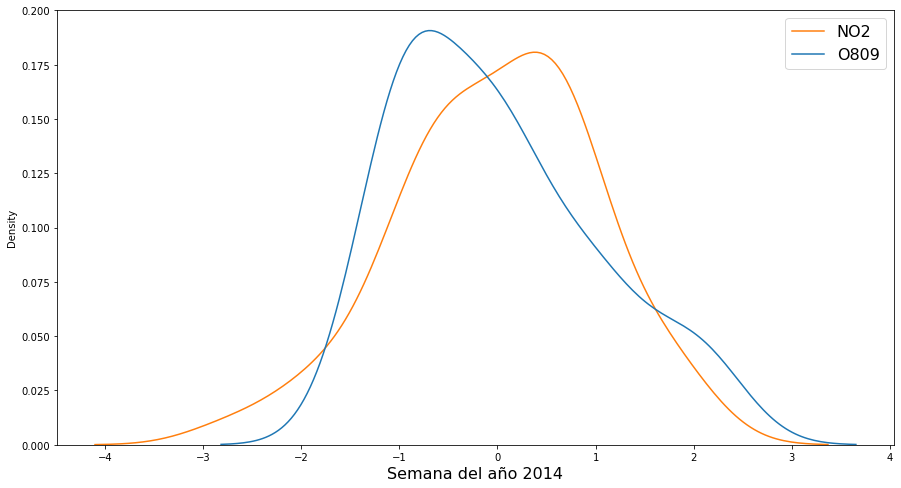

<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O829


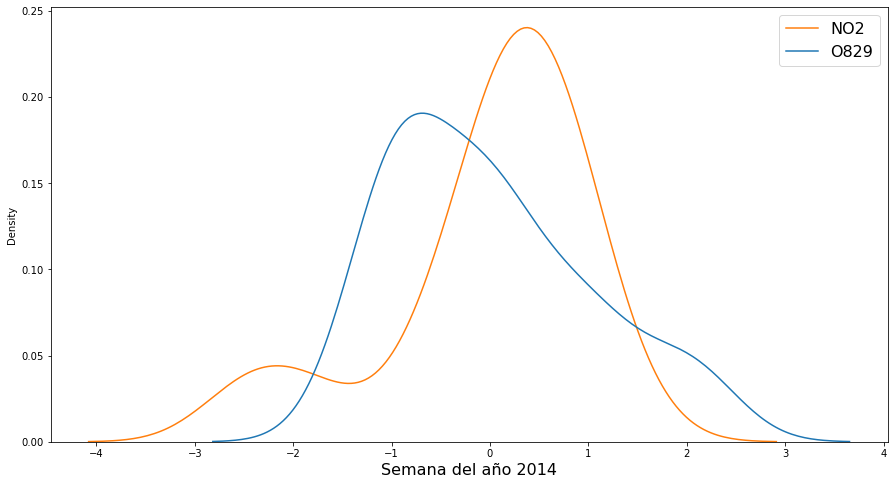

<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & O759

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


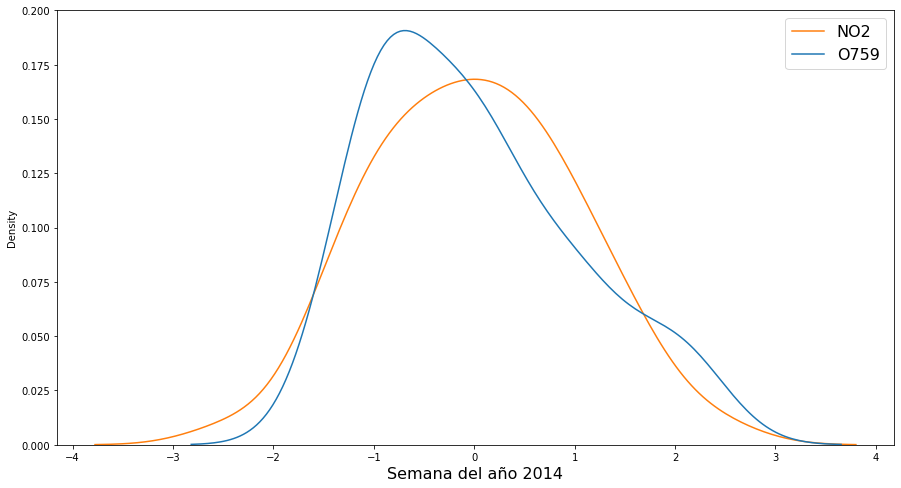

<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O064


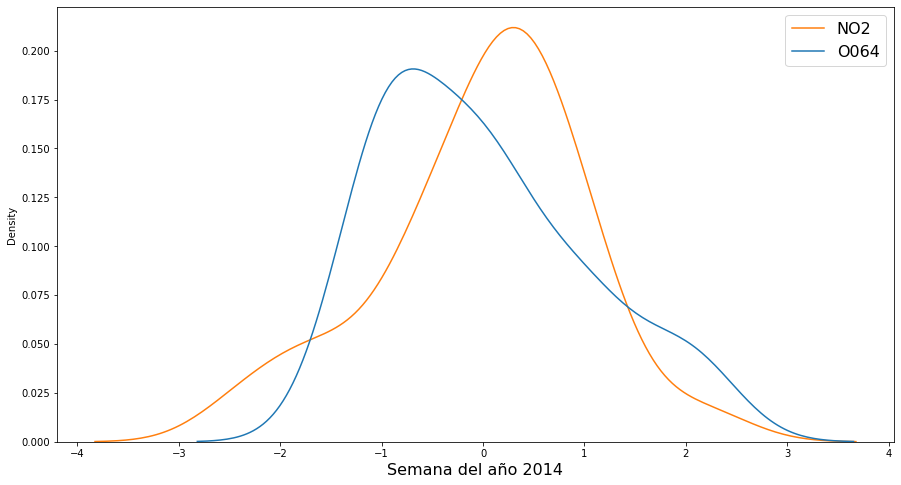

<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & K802


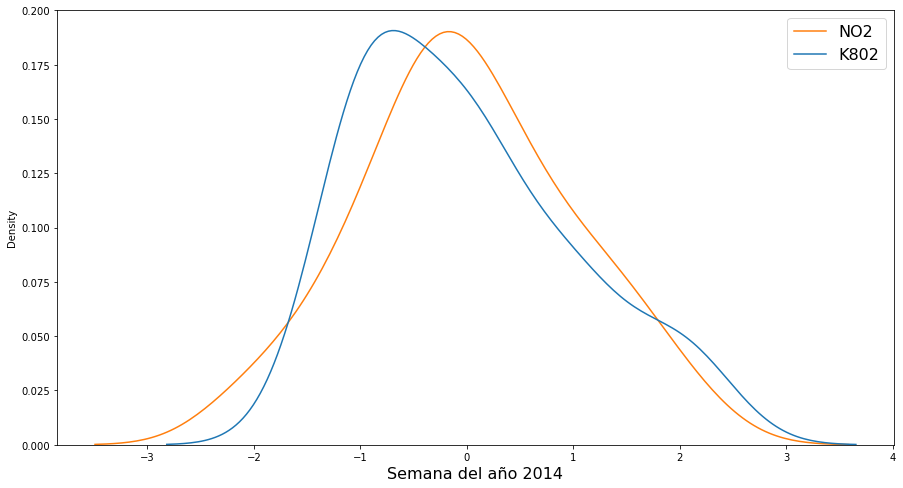

<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & J189


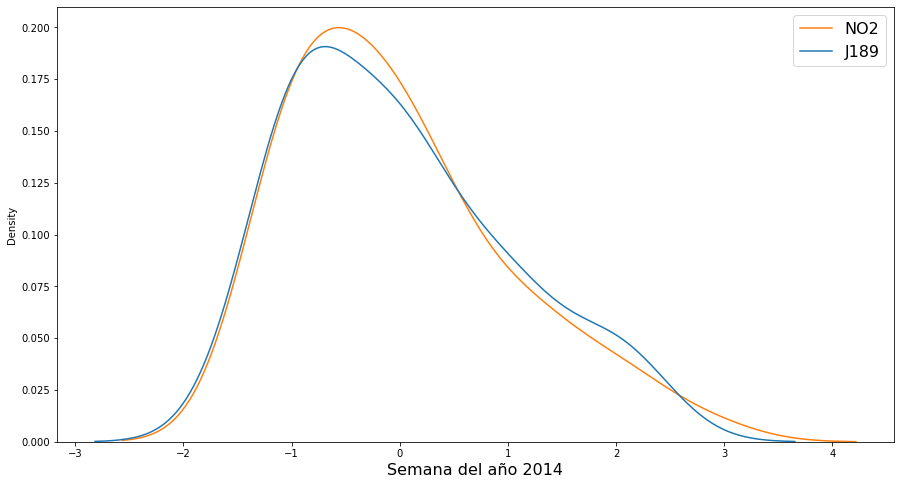

<ipython-input-10-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & O069


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


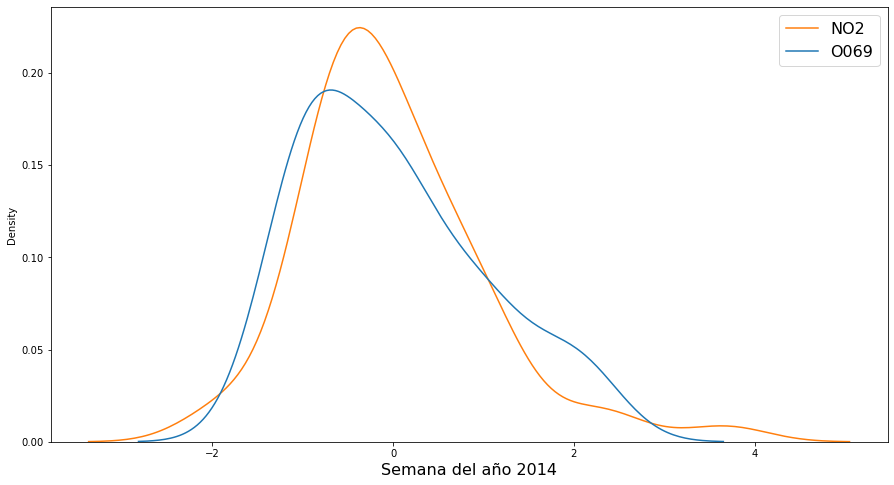

<ipython-input-10-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & H


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


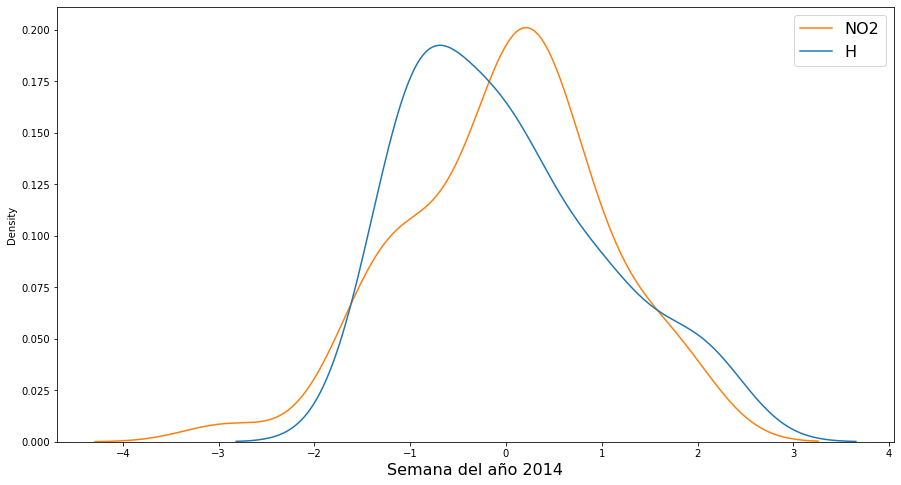

<ipython-input-10-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & I


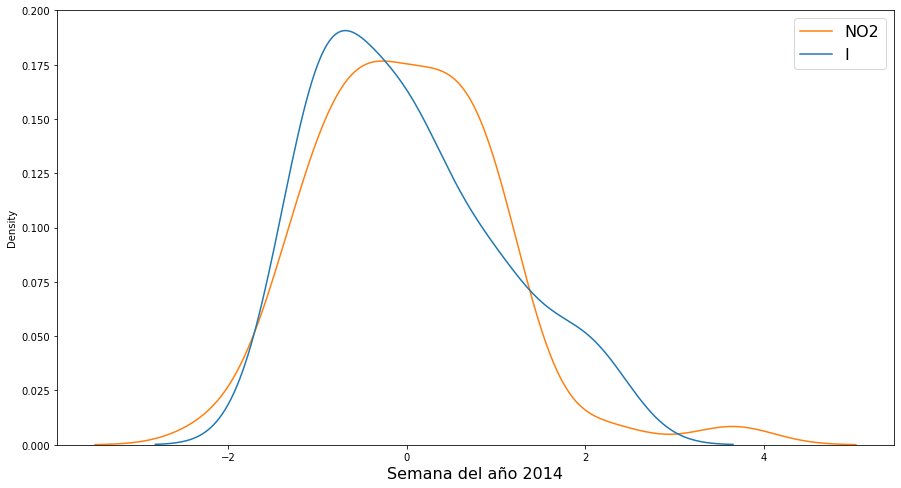

<ipython-input-10-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & J


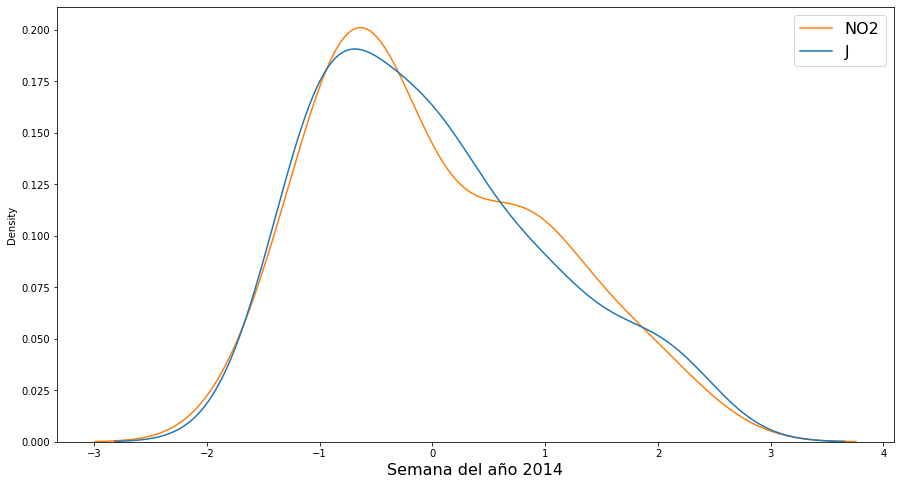

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        # ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año, fontsize=16)
        sns.kdeplot(data=df_s)
        plt.legend(labels=col_names, fontsize = 16)
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2015)

In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NO2
0,2015-01-01 00,13.1
1,2015-01-01 00,8.0
2,2015-01-01 00,4.2
3,2015-01-01 00,3.7
4,2015-01-01 00,4.5
...,...,...
44482,2015-12-31 23,1.6
44483,2015-12-31 23,8.6
44484,2015-12-31 23,7.9
44485,2015-12-31 23,8.2


In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NO2
0,2015-01-01 00:00:00,13.1
1,2015-01-01 00:00:00,8.0
2,2015-01-01 00:00:00,4.2
3,2015-01-01 00:00:00,3.7
4,2015-01-01 00:00:00,4.5
...,...,...
44482,2015-12-31 23:00:00,1.6
44483,2015-12-31 23:00:00,8.6
44484,2015-12-31 23:00:00,7.9
44485,2015-12-31 23:00:00,8.2


In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NO2,sem
0,2015-01-01 00:00:00,13.1,53
1,2015-01-01 00:00:00,8.0,53
2,2015-01-01 00:00:00,4.2,53
3,2015-01-01 00:00:00,3.7,53
4,2015-01-01 00:00:00,4.5,53
...,...,...,...
44482,2015-12-31 23:00:00,1.6,52
44483,2015-12-31 23:00:00,8.6,52
44484,2015-12-31 23:00:00,7.9,52
44485,2015-12-31 23:00:00,8.2,52


In [14]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
2721,2015-12-01 00:00:00,19,C349
3052,2015-08-24 00:00:00,19,C186
3098,2015-07-15 00:00:00,19,C509
3254,2015-06-18 00:00:00,19,C509
8651,2015-05-09 00:00:00,19,C189
...,...,...,...
2923756,2015-06-10 00:00:00,19,J342
2931414,2015-08-18 00:00:00,19,M190
2934869,2015-09-09 00:00:00,19,C229
2943586,2015-11-20 00:00:00,19,K801


In [15]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2015-12-01,19,C349,48
1,2015-08-24,19,C186,34
2,2015-07-15,19,C509,28
3,2015-06-18,19,C509,24
4,2015-05-09,19,C189,18
...,...,...,...,...
53336,2015-06-10,19,J342,23
53337,2015-08-18,19,M190,33
53338,2015-09-09,19,C229,36
53339,2015-11-20,19,K801,46


In [16]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1068
2     1016
3     1026
4     1034
5      964
6     1036
7     1048
8      983
9      938
10     978
11     906
12    1011
13     932
14     978
15    1056
16    1018
17    1010
18     966
19    1044
20     988
21     999
22     977
23    1044
24    1021
25    1052
26    1022
27    1076
28    1106
29    1039
30    1060
31    1063
32    1072
33    1073
34    1087
35    1123
36    1077
37    1103
38    1105
39    1038
40    1129
41    1128
42    1117
43    1116
44    1115
45    1059
46     992
47    1066
48    1089
49    1106
50    1138
51     790
53     359
Name: sem, dtype: int64

In [17]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-17-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-17-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-17-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[conta

,sem,NO2
0,1,14.521822
1,2,16.6357
2,3,17.880606
3,4,18.436327
4,5,15.193626
5,6,16.650748
6,7,15.785729
7,8,12.504573
8,9,11.399658
9,10,14.938685


<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2015

NO2 & O809


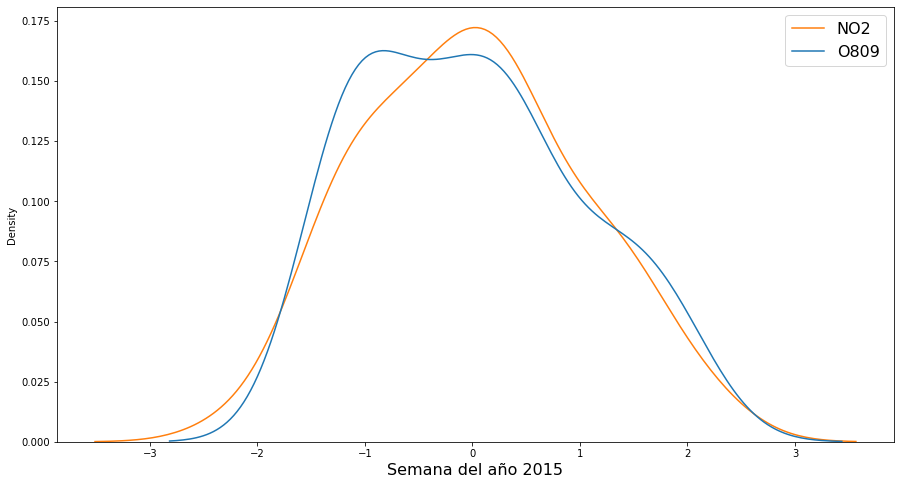

<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O829


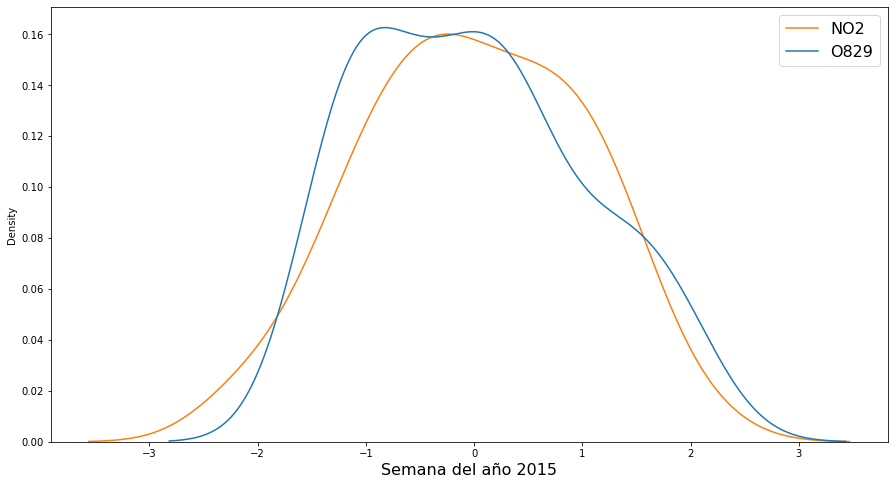

<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & O759

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


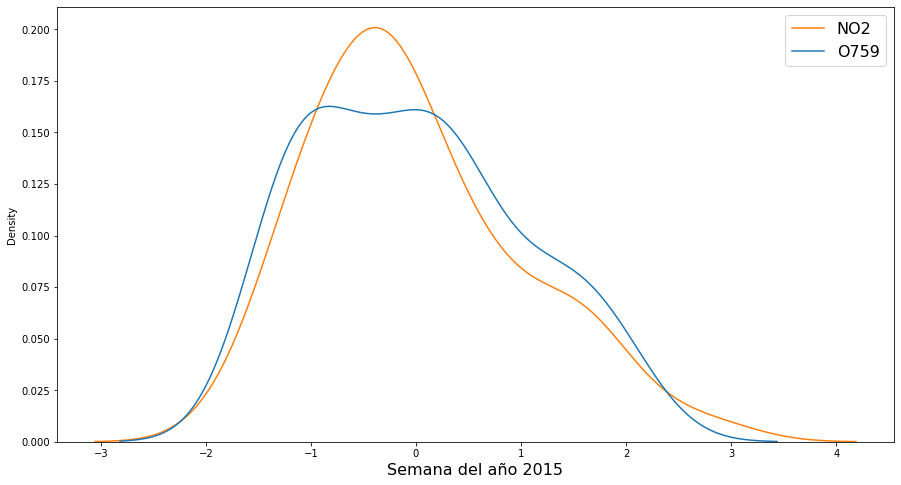

<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & O069


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


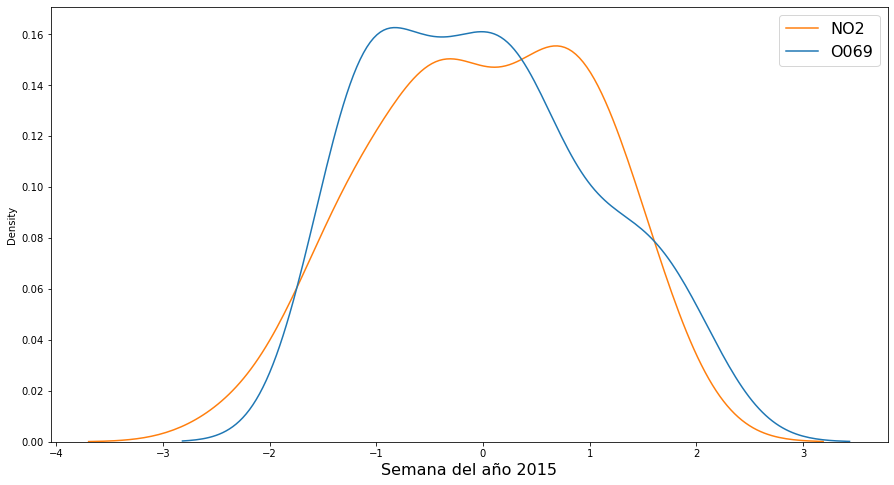

<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & K802


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


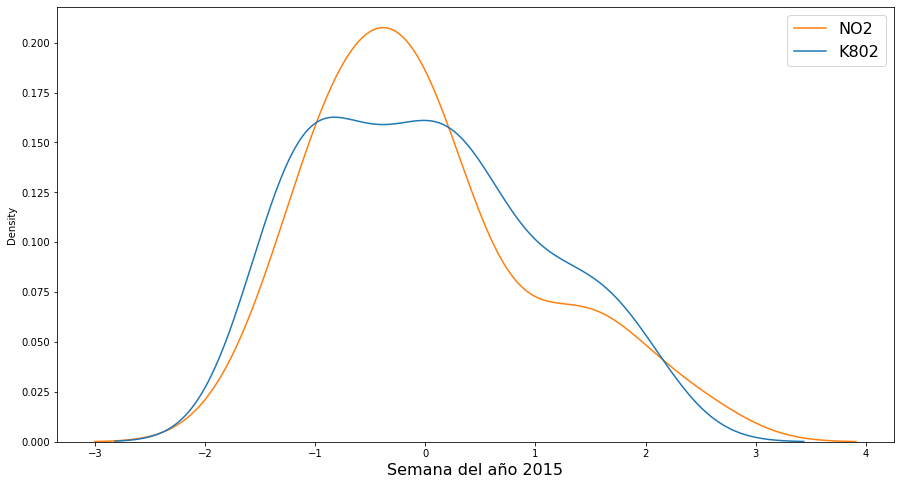

<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & K358


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


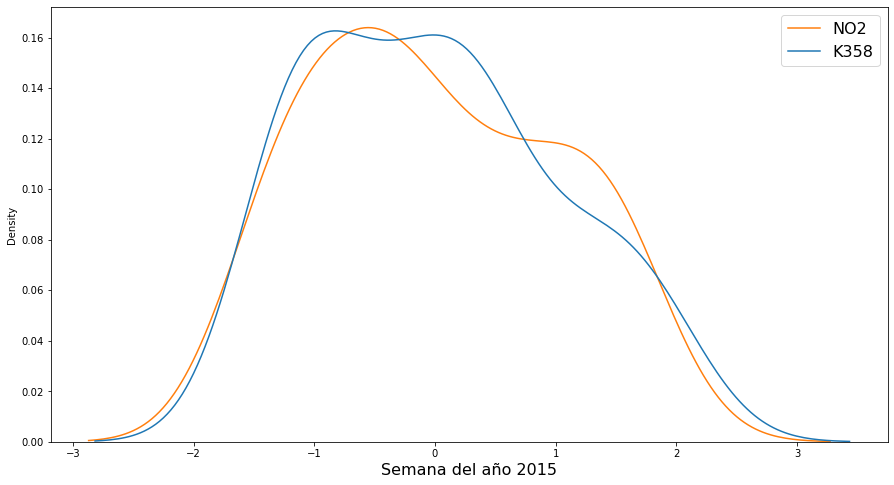

<ipython-input-18-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O064


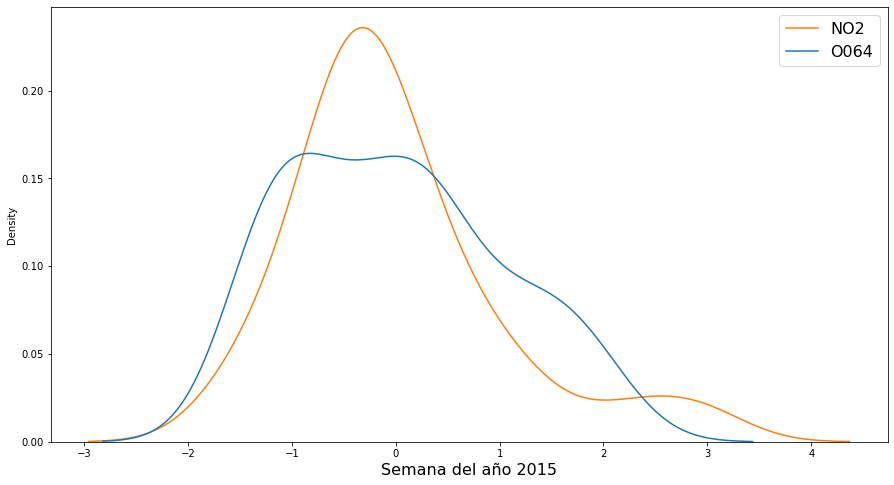

<ipython-input-18-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & H


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


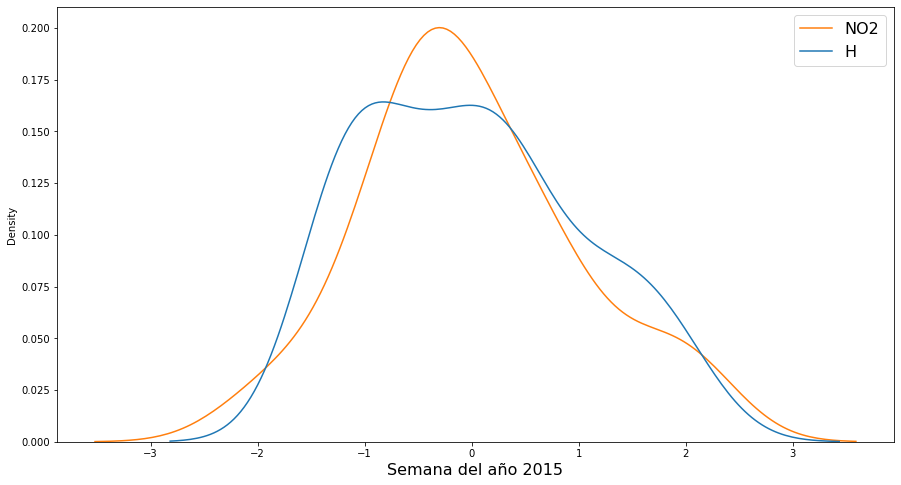

<ipython-input-18-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & I


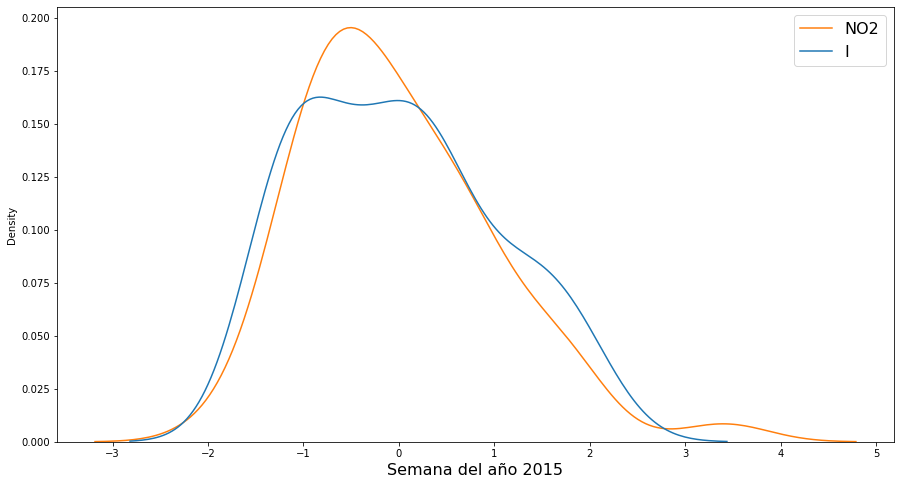

<ipython-input-18-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & J


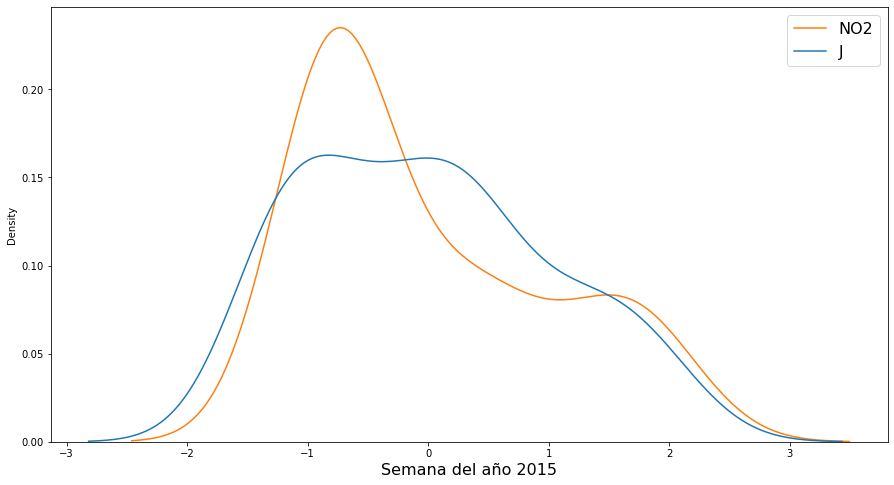

In [18]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        # ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año, fontsize=16)
        sns.kdeplot(data=df_s)
        plt.legend(labels=col_names, fontsize = 16)
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2016)

In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NO2
0,2016-01-01 00,7.200000
1,2016-01-01 00,1.500000
2,2016-01-01 00,9.200000
3,2016-01-01 00,7.400000
4,2016-01-01 00,10.500000
...,...,...
37493,2016-12-31 22,25.600000
37494,2016-12-31 23,18.600000
37495,2016-12-31 23,10.900000
37496,2016-12-31 23,39.099998


In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NO2
0,2016-01-01 00:00:00,7.200000
1,2016-01-01 00:00:00,1.500000
2,2016-01-01 00:00:00,9.200000
3,2016-01-01 00:00:00,7.400000
4,2016-01-01 00:00:00,10.500000
...,...,...
37493,2016-12-31 22:00:00,25.600000
37494,2016-12-31 23:00:00,18.600000
37495,2016-12-31 23:00:00,10.900000
37496,2016-12-31 23:00:00,39.099998


In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NO2,sem
0,2016-01-01 00:00:00,7.200000,52
1,2016-01-01 00:00:00,1.500000,52
2,2016-01-01 00:00:00,9.200000,52
3,2016-01-01 00:00:00,7.400000,52
4,2016-01-01 00:00:00,10.500000,52
...,...,...,...
37493,2016-12-31 22:00:00,25.600000,52
37494,2016-12-31 23:00:00,18.600000,52
37495,2016-12-31 23:00:00,10.900000,52
37496,2016-12-31 23:00:00,39.099998,52


In [22]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3481,04/18/2016 00:00,19,D433
5587,06/01/2016 00:00,19,I619
7319,08/18/2016 00:00,19,Q531
231176,10/05/2016 00:00,19,O429
235923,12/28/2015 00:00,19,Z980
...,...,...,...
979888,06/29/2016 00:00,19,O240
981083,11/08/2016 00:00,19,S407
981131,11/08/2016 00:00,19,S407
1011116,07/28/2016 00:00,19,S099


In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2016-04-18,19,D433,16
1,2016-06-01,19,I619,22
2,2016-08-18,19,Q531,33
3,2016-10-05,19,O429,40
4,2016-12-18,19,T009,51
...,...,...,...,...
211,2016-06-29,19,O240,26
212,2016-11-08,19,S407,45
213,2016-11-08,19,S407,45
214,2016-07-28,19,S099,30


In [24]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1      5
2      1
3     11
4      4
5      6
6      3
7      1
8      3
9      7
10     2
11     4
12     2
13     1
14     6
15     6
16     6
17     3
18     6
19     6
20     2
21     3
22     5
23     5
24     1
25     7
26     5
27     4
28     2
29     2
30     8
31     2
32     7
33     6
34     1
35     2
36     4
37     5
38     2
39     5
40     4
41     2
42     6
43     4
44     2
45     7
46     5
47     2
48     3
49     3
50     7
51     6
52     4
Name: sem, dtype: int64

In [25]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-25-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-25-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-25-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[conta

,sem,NO2
0,1,11.772687
1,2,13.813201
2,3,14.865807
3,4,14.770274
4,5,11.957084
5,6,14.050335
6,7,12.100422
7,8,9.245718
8,9,10.380658
9,10,11.376357


<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2016

NO2 & F200


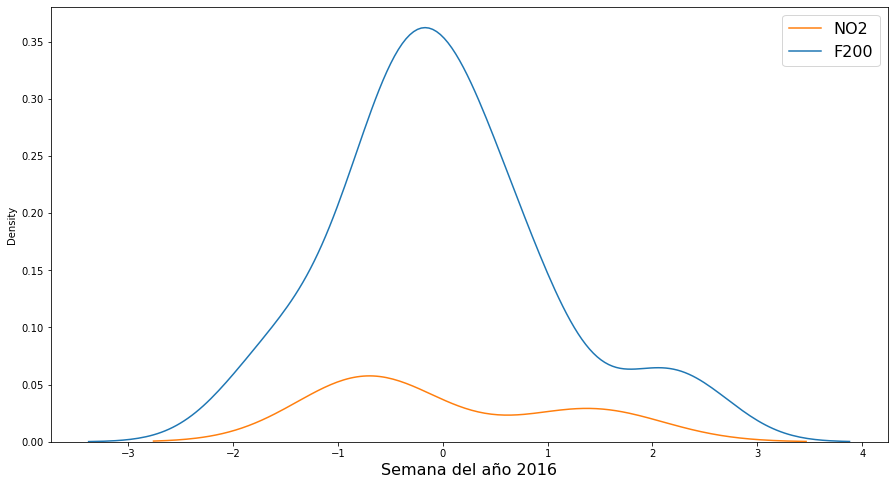

<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O809


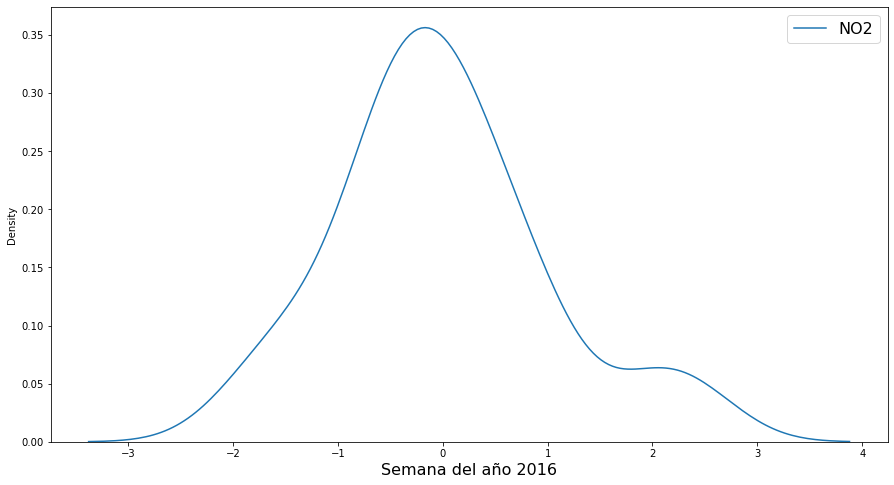

<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & F312


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


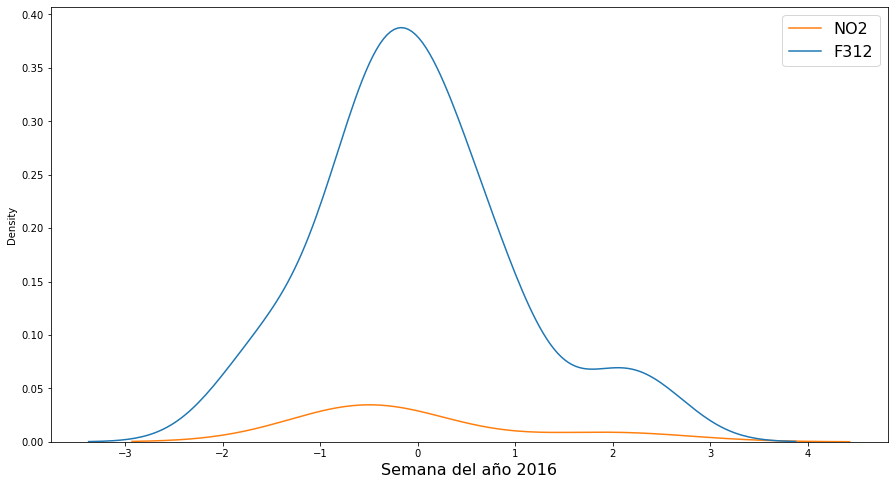

<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & C029


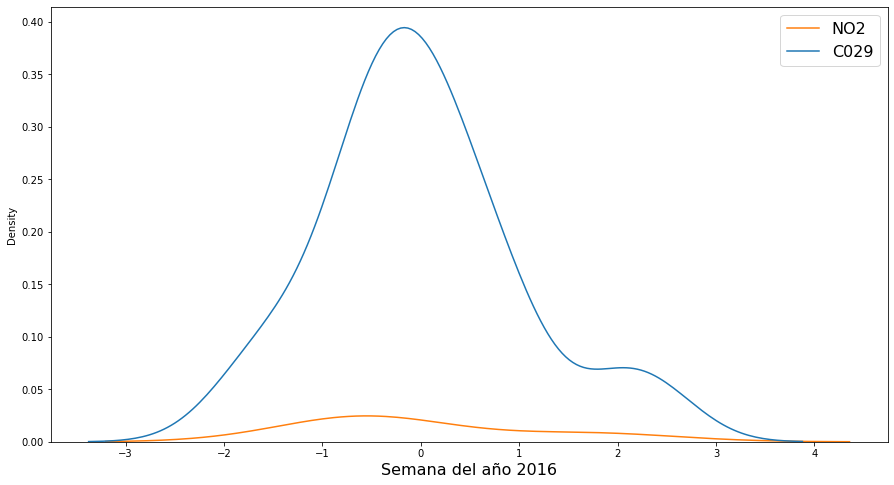

<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & F710


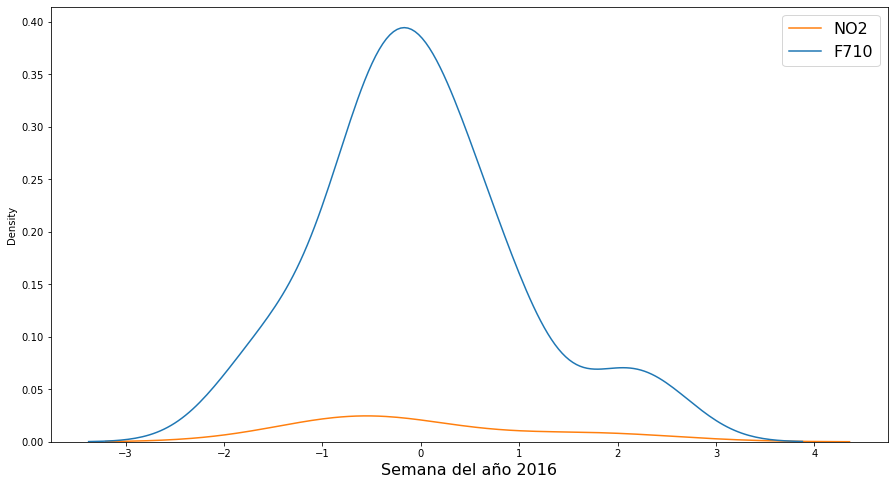

<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & T009


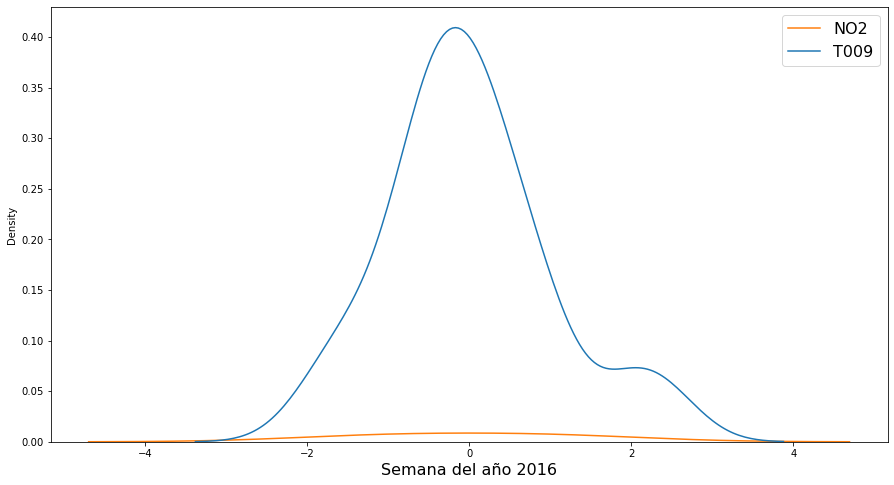

<ipython-input-26-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & F322


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


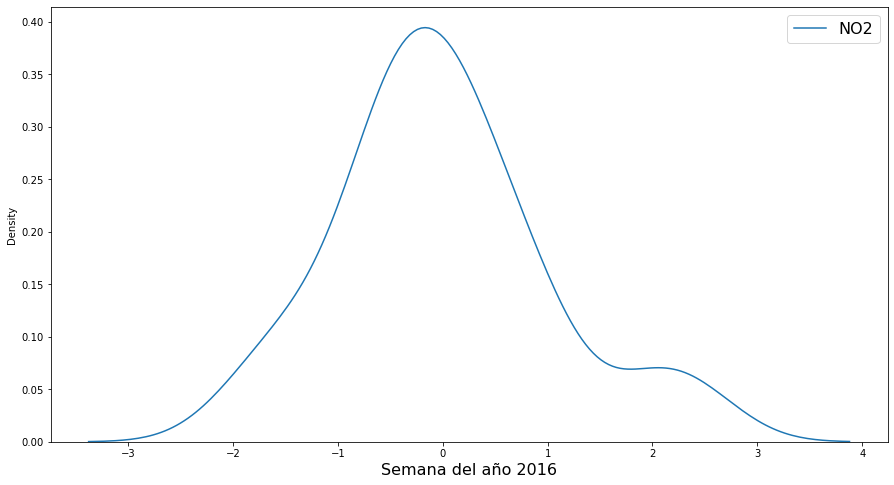

<ipython-input-26-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & H


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


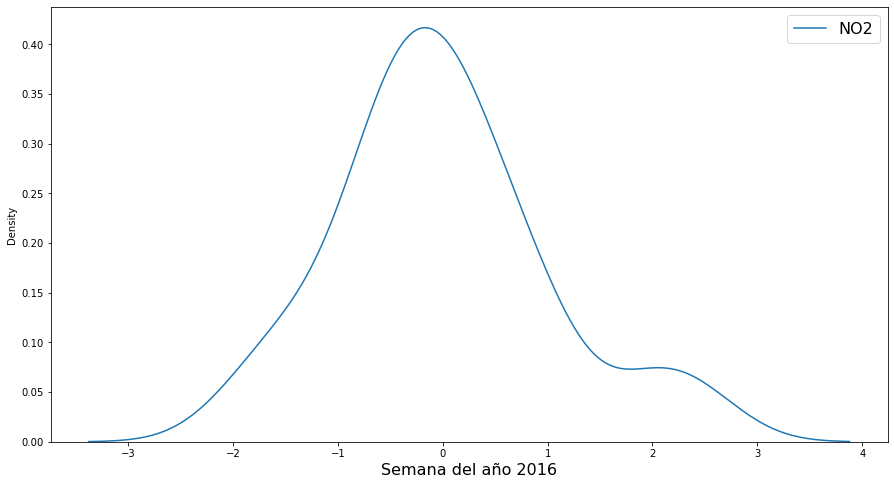

<ipython-input-26-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & I


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


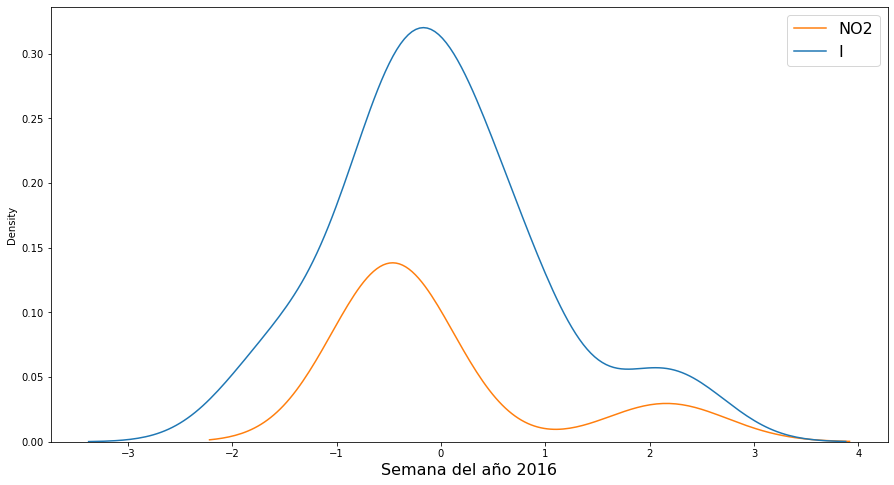

<ipython-input-26-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & J

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


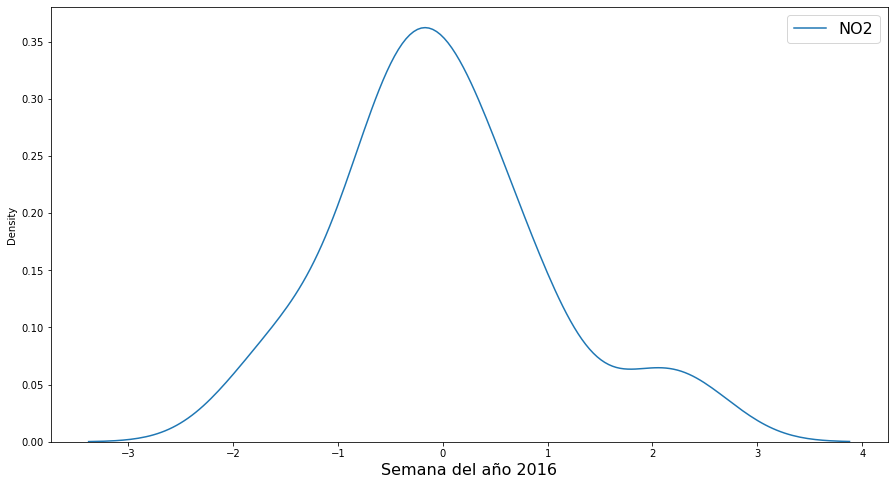

In [26]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        # ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año, fontsize=16)
        sns.kdeplot(data=df_s)
        plt.legend(labels=col_names, fontsize = 16)
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2017)

In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NO2
0,2017-01-01 00,15.1
1,2017-01-01 00,9.7
2,2017-01-01 00,35.2
3,2017-01-01 00,20.1
4,2017-01-01 01,11.7
...,...,...
44446,2017-12-31 23,13.1
44447,2017-12-31 23,10.4
44448,2017-12-31 23,17.0
44449,2017-12-31 23,5.0


In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NO2
0,2017-01-01 00:00:00,15.1
1,2017-01-01 00:00:00,9.7
2,2017-01-01 00:00:00,35.2
3,2017-01-01 00:00:00,20.1
4,2017-01-01 01:00:00,11.7
...,...,...
44446,2017-12-31 23:00:00,13.1
44447,2017-12-31 23:00:00,10.4
44448,2017-12-31 23:00:00,17.0
44449,2017-12-31 23:00:00,5.0


In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NO2,sem
0,2017-01-01 00:00:00,15.1,1
1,2017-01-01 00:00:00,9.7,1
2,2017-01-01 00:00:00,35.2,1
3,2017-01-01 00:00:00,20.1,1
4,2017-01-01 01:00:00,11.7,1
...,...,...,...
44446,2017-12-31 23:00:00,13.1,1
44447,2017-12-31 23:00:00,10.4,1
44448,2017-12-31 23:00:00,17.0,1
44449,2017-12-31 23:00:00,5.0,1


In [30]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
9836,2017-02-07 00:00:00,19,F120
11959,2017-10-24 00:00:00,19,E104
25534,2017-05-26 00:00:00,19,O680
27114,2017-04-14 00:00:00,19,T634
37193,2017-03-18 00:00:00,19,Q248
...,...,...,...
2720507,2017-08-21 00:00:00,19,N61X
2723613,2017-11-05 00:00:00,19,O809
2726650,2017-07-22 00:00:00,19,O809
2727207,2017-12-09 00:00:00,19,O809


In [31]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2017-02-07,19,F120,6
1,2017-10-24,19,E104,43
2,2017-05-26,19,O680,21
3,2017-04-14,19,T634,15
4,2017-03-18,19,Q248,11
...,...,...,...,...
56164,2017-08-21,19,N61X,34
56165,2017-11-05,19,O809,45
56166,2017-07-22,19,O809,29
56167,2017-12-09,19,O809,49


In [32]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1199
2     1069
3     1051
4     1048
5     1038
6     1014
7     1053
8     1011
9     1039
10    1110
11    1068
12    1016
13    1030
14     978
15     965
16     959
17     954
18     989
19     943
20    1134
21    1016
22     968
23    1105
24    1147
25    1033
26    1040
27    1142
28    1025
29    1118
30    1178
31    1138
32    1100
33    1203
34    1114
35    1160
36    1178
37    1128
38    1145
39    1113
40    1169
41    1237
42    1129
43    1105
44    1121
45    1133
46    1149
47    1121
48    1139
49    1132
50    1057
51    1054
52     904
Name: sem, dtype: int64

In [33]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-33-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-33-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-33-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[conta

,sem,NO2
0,1,11.965543
1,2,14.216717
2,3,10.971231
3,4,13.054331
4,5,13.879758
5,6,13.226197
6,7,12.077278
7,8,15.904427
8,9,13.32685
9,10,13.533754


<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2017

NO2 & O809


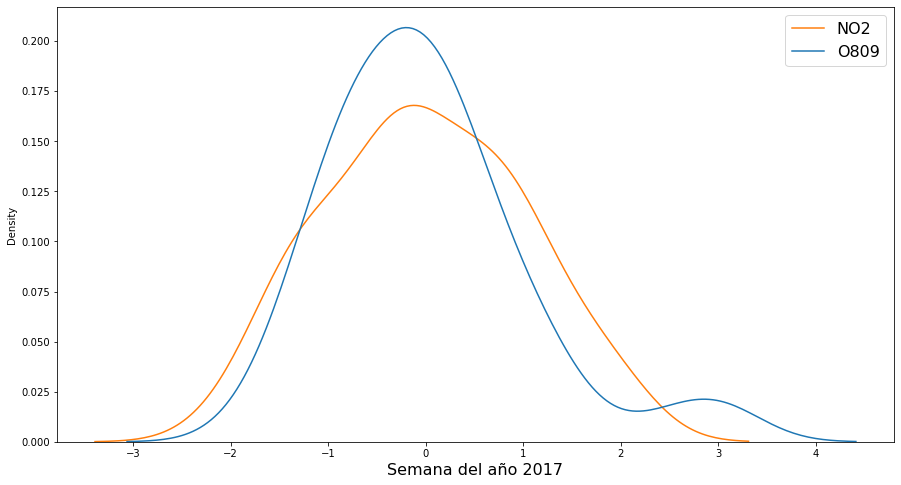

<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O829


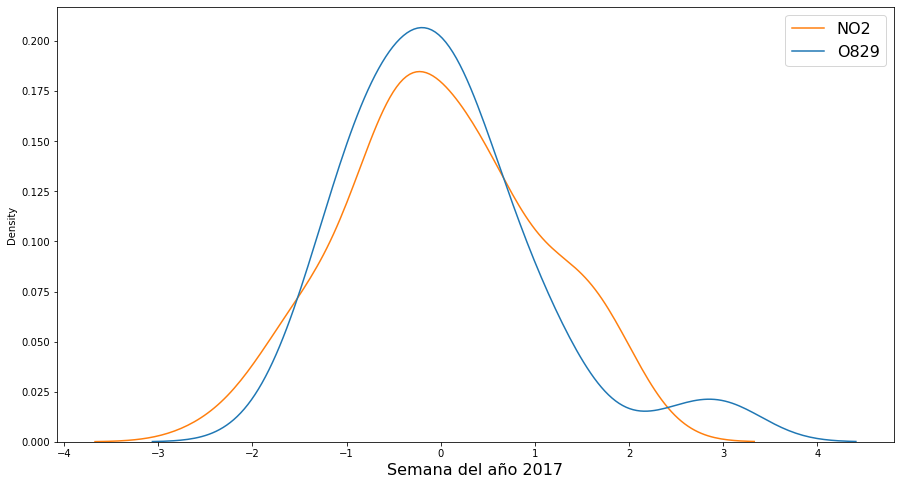

<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & O759

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


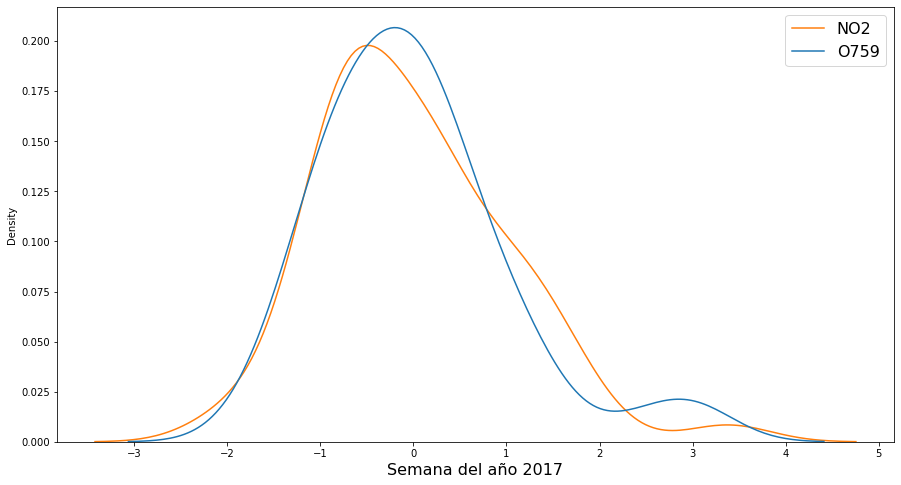

<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & O069


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


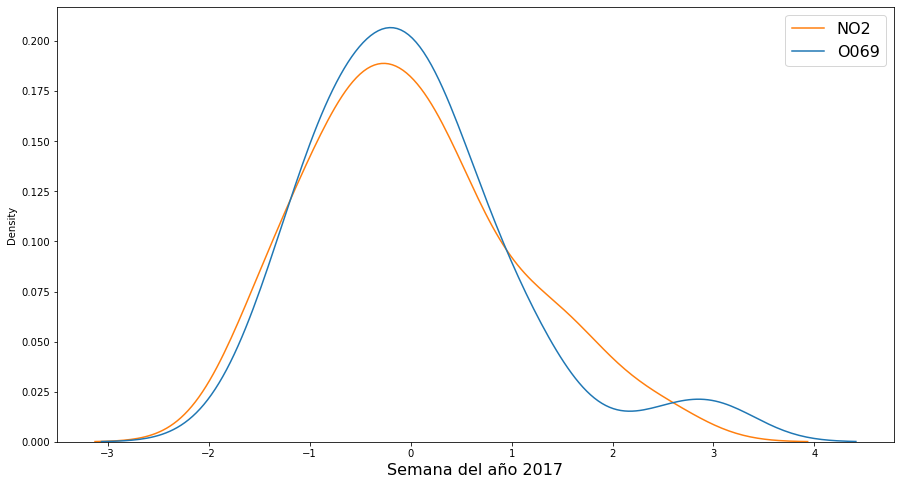

<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & K802

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


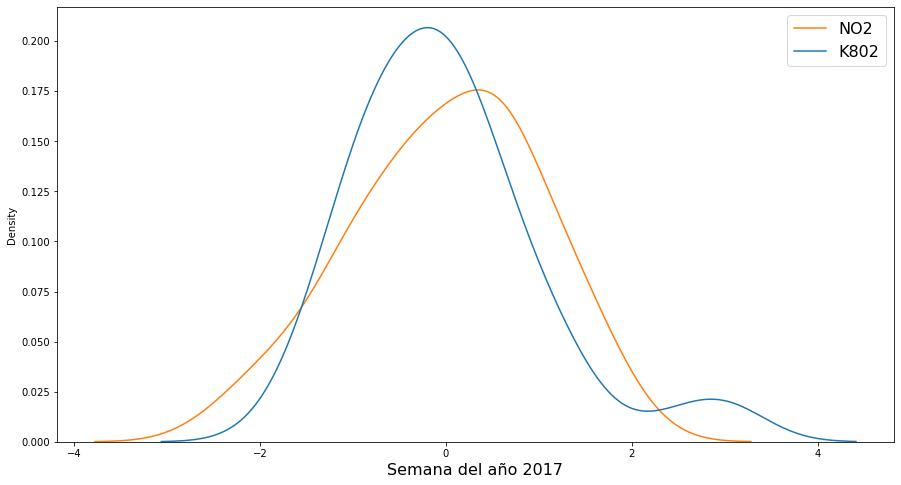

<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & N40X


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


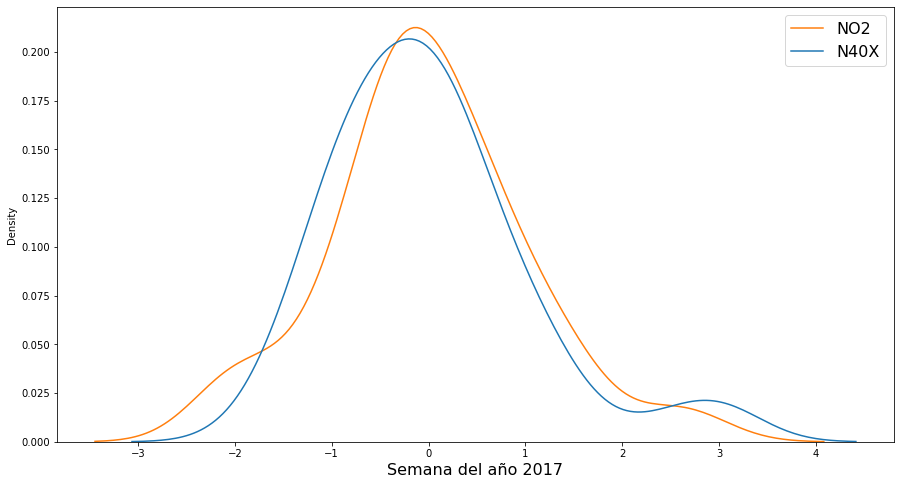

<ipython-input-34-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & J189


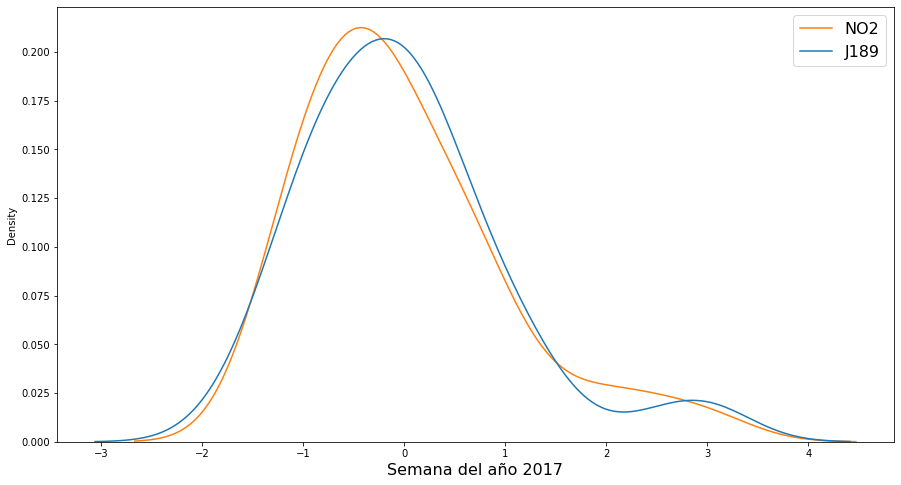

<ipython-input-34-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & H


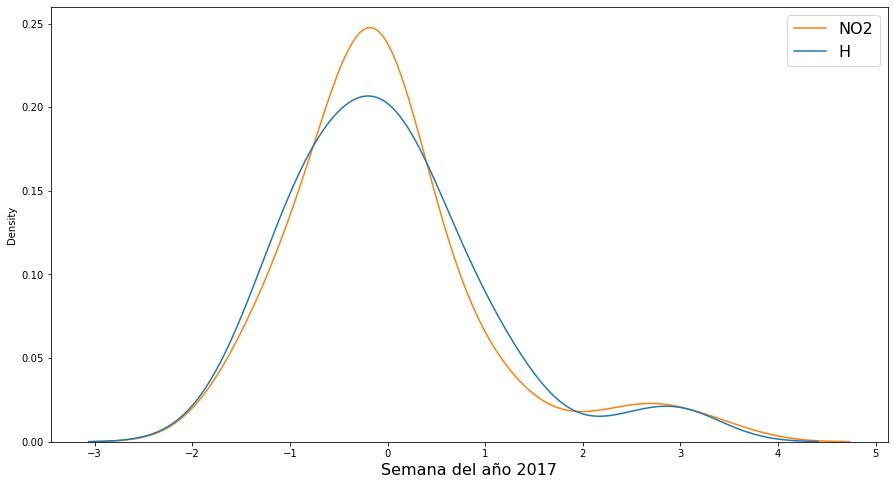


NO2 & I

<ipython-input-34-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


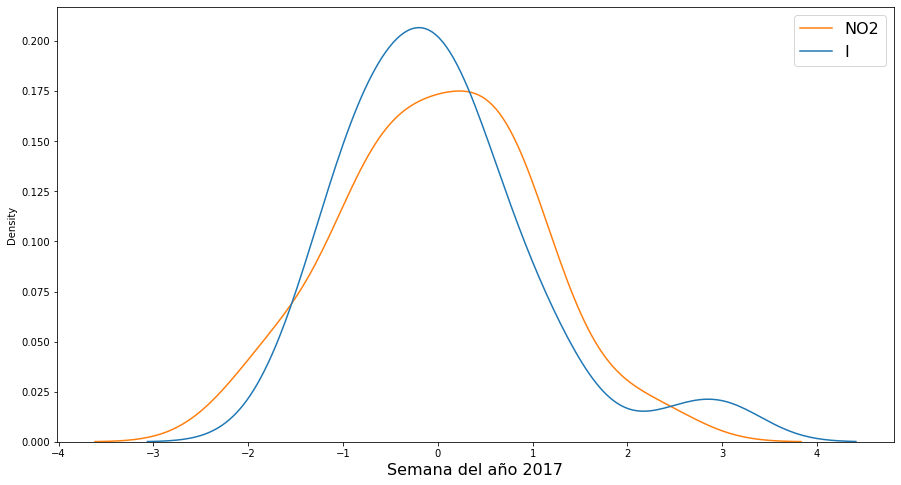

<ipython-input-34-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & J


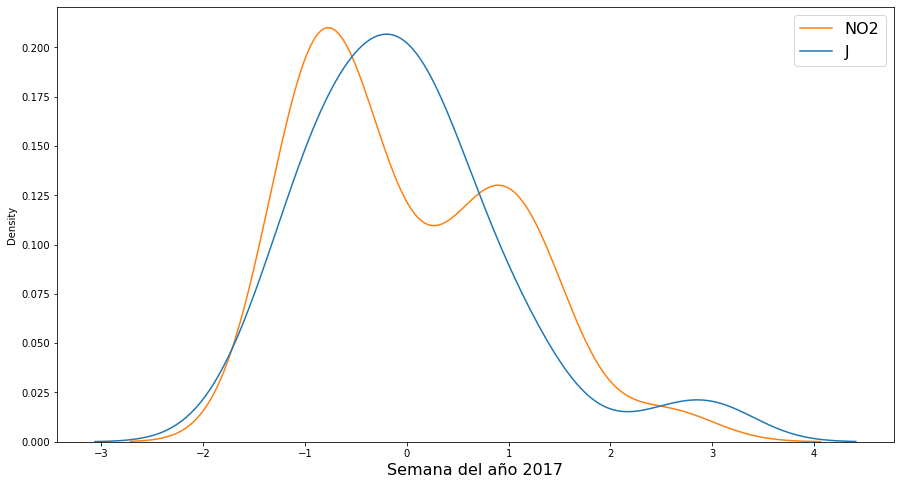

In [34]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        # ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año, fontsize=16)
        sns.kdeplot(data=df_s)
        plt.legend(labels=col_names, fontsize = 16)
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2018)

In [35]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NO2
0,2018-01-01 01,2.900000
1,2018-01-01 01,15.200000
2,2018-01-01 01,2.900000
3,2018-01-01 01,17.800000
4,2018-01-01 01,3.600000
...,...,...
41615,2018-12-31 23,21.600000
41616,2018-12-31 23,31.400000
41617,2018-12-31 23,8.400000
41618,2018-12-31 23,11.800000


In [36]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NO2
0,2018-01-01 01:00:00,2.900000
1,2018-01-01 01:00:00,15.200000
2,2018-01-01 01:00:00,2.900000
3,2018-01-01 01:00:00,17.800000
4,2018-01-01 01:00:00,3.600000
...,...,...
41615,2018-12-31 23:00:00,21.600000
41616,2018-12-31 23:00:00,31.400000
41617,2018-12-31 23:00:00,8.400000
41618,2018-12-31 23:00:00,11.800000


In [37]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NO2,sem
0,2018-01-01 01:00:00,2.900000,1
1,2018-01-01 01:00:00,15.200000,1
2,2018-01-01 01:00:00,2.900000,1
3,2018-01-01 01:00:00,17.800000,1
4,2018-01-01 01:00:00,3.600000,1
...,...,...,...
41615,2018-12-31 23:00:00,21.600000,1
41616,2018-12-31 23:00:00,31.400000,1
41617,2018-12-31 23:00:00,8.400000,1
41618,2018-12-31 23:00:00,11.800000,1


In [38]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3678,2018-11-15 00:00:00.000,19,N189
3709,2018-08-30 00:00:00.000,19,G562
7046,2018-05-21 00:00:00.000,19,E145
19178,2018-04-26 00:00:00.000,19,P073
100477,2018-08-28 00:00:00.000,19,F191
...,...,...,...
2603999,2018-09-12 00:00:00.000,19,J459
2604006,2018-04-05 00:00:00.000,19,S729
2616019,2018-04-10 00:00:00.000,19,R101
2617800,2018-07-18 00:00:00.000,19,C505


In [39]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2018-11-15,19,N189,46
1,2018-08-30,19,G562,35
2,2018-05-21,19,E145,21
3,2018-04-26,19,P073,17
4,2018-08-28,19,F191,35
...,...,...,...,...
54466,2018-09-12,19,J459,37
54467,2018-04-05,19,S729,14
54468,2018-04-10,19,R101,15
54469,2018-07-18,19,C505,29


In [40]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1014
2     1037
3     1081
4      984
5     1056
6      994
7     1057
8     1078
9     1039
10    1023
11    1098
12     977
13    1015
14    1024
15    1048
16    1092
17    1049
18     908
19     997
20     980
21    1054
22    1004
23    1087
24    1073
25    1008
26    1082
27    1074
28    1036
29    1056
30    1068
31    1118
32    1108
33    1083
34    1079
35    1136
36    1055
37    1157
38    1163
39    1179
40    1123
41    1192
42    1061
43    1082
44    1002
45    1073
46    1069
47     990
48     994
49     995
50     937
51     973
52     809
Name: sem, dtype: int64

In [41]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-41-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-41-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-41-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[conta

,sem,NO2
0,1,16.23237
1,2,20.330123
2,3,17.723694
3,4,17.324397
4,5,18.167679
5,6,17.848679
6,7,18.395095
7,8,16.663573
8,9,13.786121
9,10,11.613287


<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2018

NO2 & O809


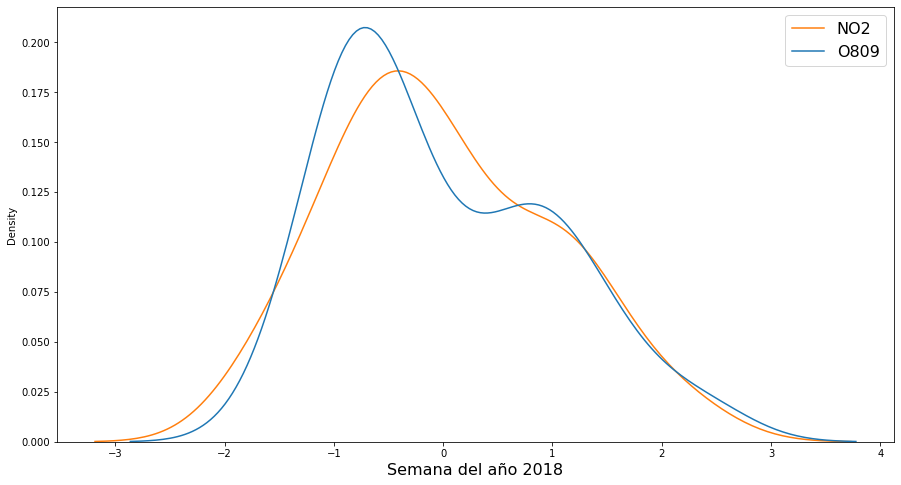

<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O829


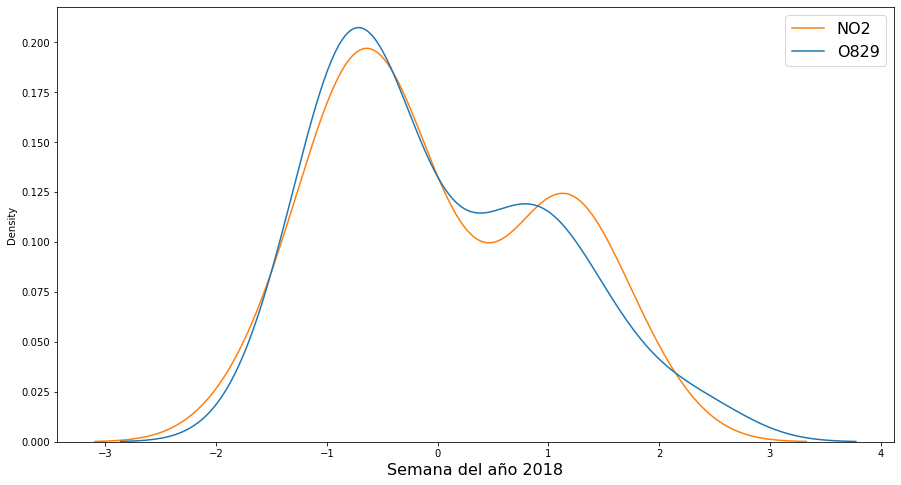

<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & K802


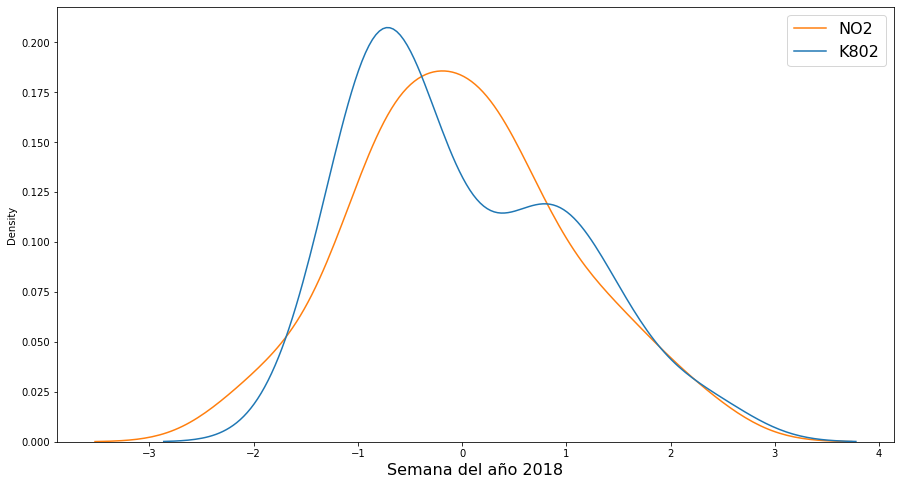

<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O342


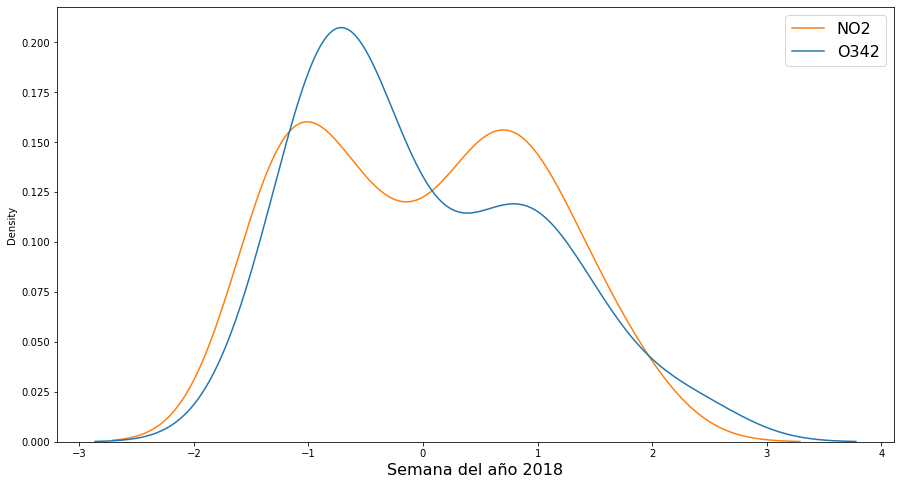


NO2 & N40X


<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


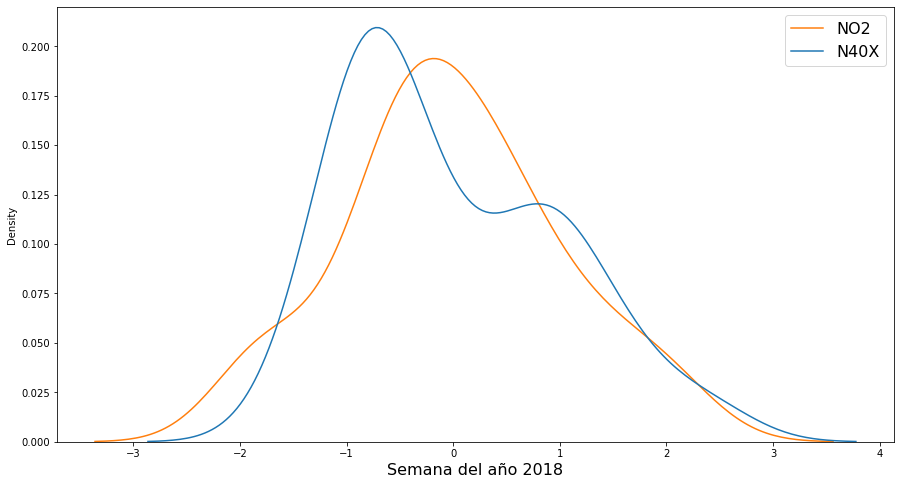

<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



NO2 & K358


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


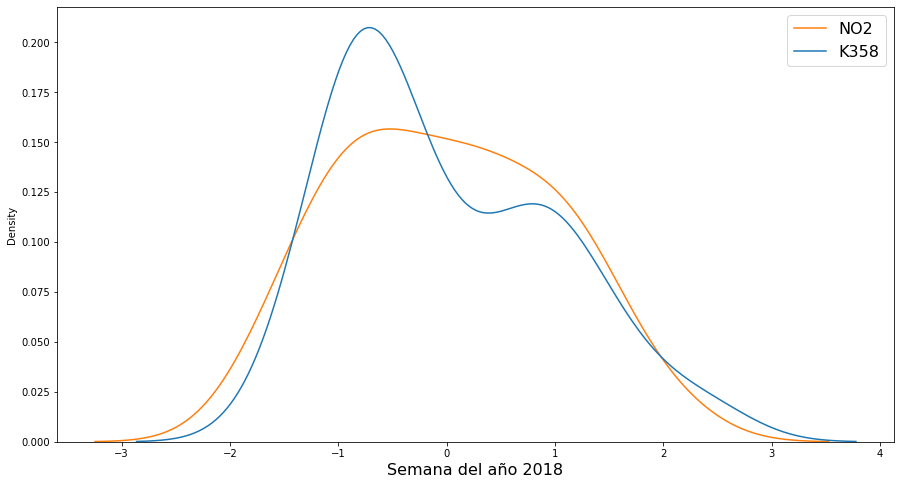

<ipython-input-42-ff6f5054a694>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & O759


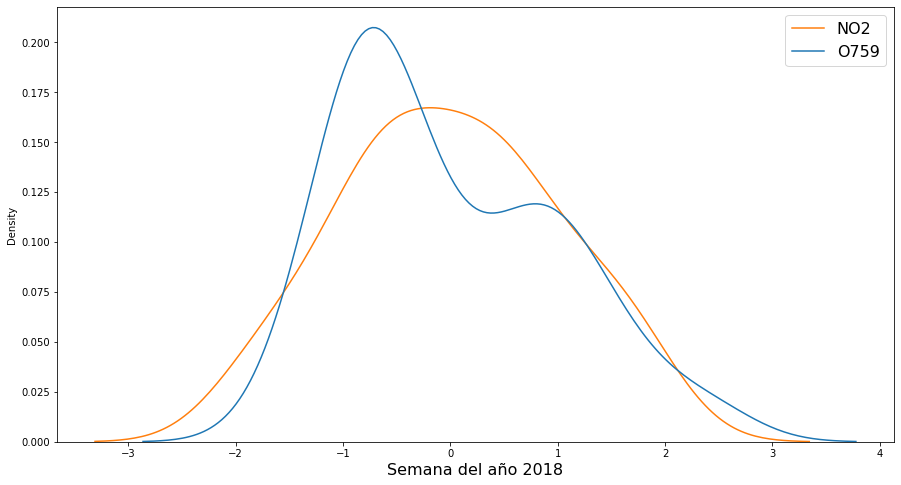

<ipython-input-42-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & H


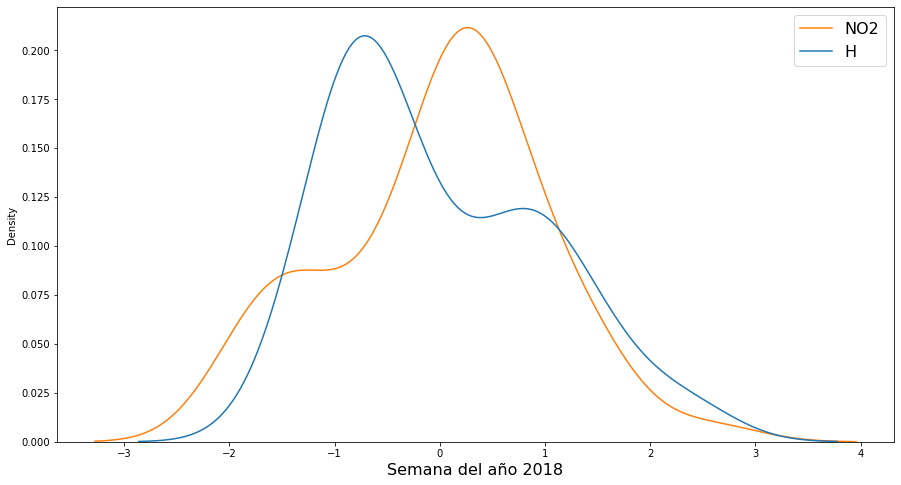

<ipython-input-42-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & I


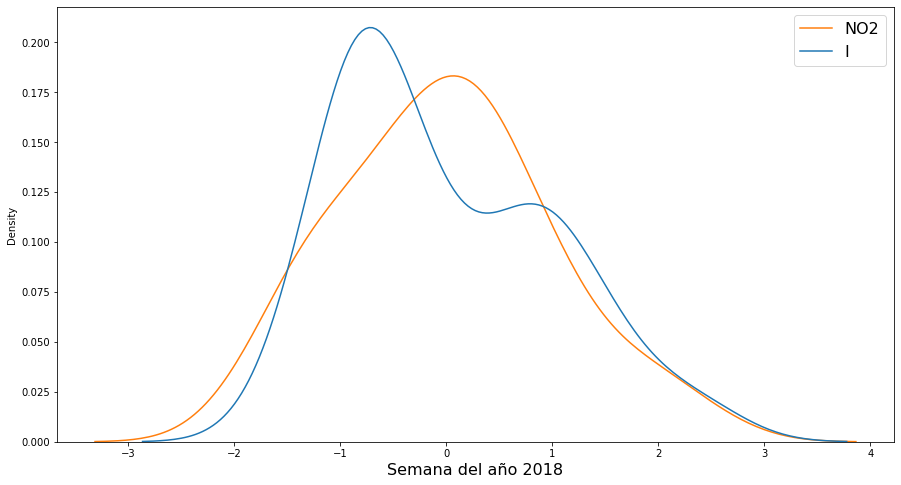

<ipython-input-42-ff6f5054a694>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



NO2 & J


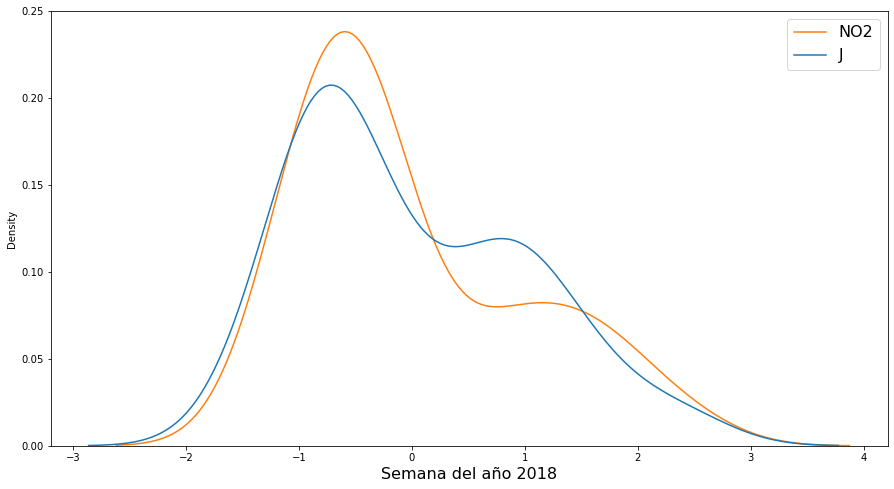

In [42]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(15, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        # ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año, fontsize=16)
        sns.kdeplot(data=df_s)
        plt.legend(labels=col_names, fontsize = 16)
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1